In [1]:
from clustering.preprocess import Preprocess
from clustering.kmeans import KMeansClustering
from clustering.lda import LDA
import logging
logging.getLogger().setLevel(logging.INFO)

In [2]:
data_dev = Preprocess.open_csv("F:\Thesis\data\SemEval\hateval2019_en_dev.csv")
data_train = Preprocess.open_csv("F:\Thesis\data\SemEval\hateval2019_en_train.csv")
HS = '1'
TR = '0'
AG = '1'
filtered_dev = Preprocess.filter_sem_eval(X=data_dev, HS=HS, TR=TR, AG=AG)
filtered_train = Preprocess.filter_sem_eval(X=data_train, HS=HS, TR=TR, AG=AG)
filtered_data = filtered_dev + filtered_train
tweets = [x[1] for x in filtered_data]
cleaned_data = Preprocess.clean(X=tweets)
km = KMeansClustering()
X = km.fit_tfidf(cleaned_data)
X = km.fit_lsa(X)

INFO:root:Original data length: 1000
INFO:root:After applying filters: 95
INFO:root:Data length after removing invalid tweets: 25
INFO:root:Original data length: 9000
INFO:root:After applying filters: 1064
INFO:root:Data length after removing invalid tweets: 291
INFO:root:Explained variance of the SVD step: 50%


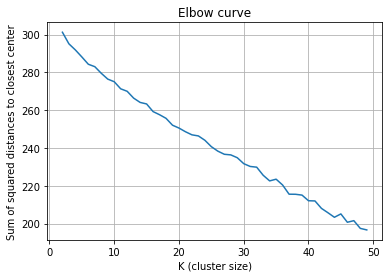

In [3]:
%matplotlib inline
km.plot_elbow_curve(max_k=50, X=X)

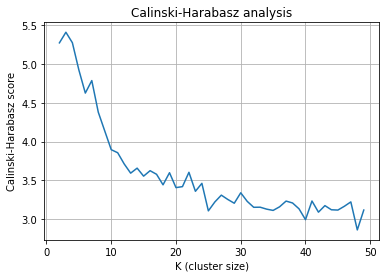

In [4]:
%matplotlib inline
# Higher values are better, when clusters are dense and well separated
km.plot_calinski_harabasz_analysis(max_k=50, X=X)

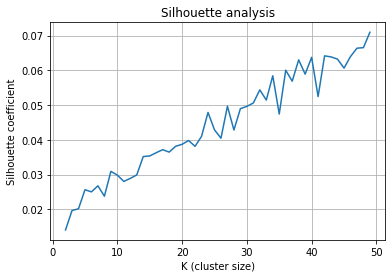

In [5]:
%matplotlib inline
# Higher values are better
km.plot_silhouette_analysis(max_k=50, X=X)

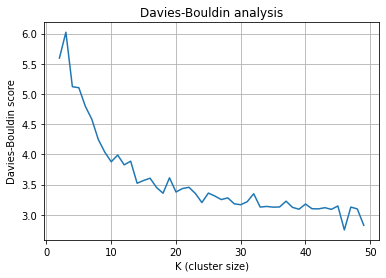

In [6]:
%matplotlib inline
# Values close to zero indicate a better partition
km.plot_davies_bouldin_score_analysis(max_k=50, X=X)

In [7]:
K = 5
km.cluster(X= X, K=K)
km.print_top_terms()

Cluster 0:
 migrants need kitchen shut time stay woman women citizens needs

Cluster 1:
 bitch women dick like rape ass bitches whore shit suck

Cluster 2:
 illegal aliens immigrants alien immigration american legal america time laws

Cluster 3:
 country hell people vote usa feeders want doomed let bringing

Cluster 4:
 wall just border build deport don need dollars pledged 500



In [8]:
NUM_SAMPLES=10
km.cluster(X= X, K=K)
km.print_most_representative_samples(original_data=filtered_data, X=X, num_samples=NUM_SAMPLES)

Cluster 0: most representative sample indices: [239 241 300 251 260  24 255 297 231 242]
['4912', "niggas think bitches supposed to suck their lil ass dick and not give a bitch head too, like that's not how it works whore !!", '1', '0', '1', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['4930', 'LMFAO lil biddy whores prison rape bitch im whose bitch', '1', '0', '1', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['6226', 'I want a bitch who gone rape me when she feening for the dick🤷🏽\u200d♂️', '1', '0', '1', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['5119', 'Love a bitch for what ? all she good for is sucking dick!', '1', '0', '1', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['5217', 'Shoutout to all you passive aggressive bitches... Go choke on a dick, bitch', '1', '0', '1', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['19199', 'I hate bitches who talk about ni

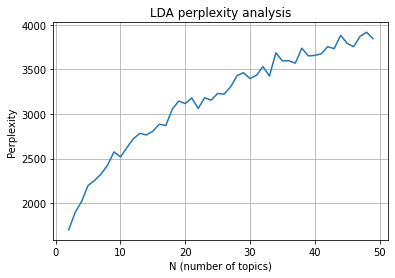

In [9]:
lda = LDA()
X = lda.fit_tf(X=cleaned_data)
# Lower values are better
# Perplexity indicates how well the probability model predicts the samples
lda.plot_perplexity(max_n=50, X=X)

In [10]:
pred = lda.fit_lda(X=X, n_components=10)
lda.print_top_terms()

Topic:  0
['immigration', 'hell', 'muslim', 'country', 'right', 'don', 'come', 'america', 'need', 'migrants']
Topic:  1
['illegal', 'bitch', 'like', 'immigration', 'dick', 'migrants', 'stay', 'needs', 'trump', 'ass']
Topic:  2
['women', 'bad', 'don', 'kitchen', 'stay', 'country', 'laws', 'make', 'bitch', 'away']
Topic:  3
['vote', 'american', 'illegal', 'like', 'sick', 'mexican', 'deport', 'bad', 'dems', 'usa']
Topic:  4
['illegal', 'aliens', 'wall', 'want', 'need', 'stop', 'way', 'border', 'build', 'immigrants']
Topic:  5
['illegal', 'just', 'think', 'don', 'alien', 'say', 'joke', 'need', 'today', 'immigrants']
Topic:  6
['refugees', 'people', 'country', 'american', 'bitch', 'fuck', 'want', 'make', 'dont', 'issue']
Topic:  7
['like', 'rape', 'bitch', 'people', 'illegal', 'wall', 'support', 'mexico', 'country', 'trump']
Topic:  8
['country', 'just', 'want', 'rape', 'bitch', 'time', 'know', 'immigrants', 'welfare', 'women']
Topic:  9
['border', 'migrants', 'life', 'bitch', 'shut', 'vote